In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv(Path('sealevel.csv'))
df.head()

,Year,TotalWeightedObservations,Global Isostatic Adjustment,Standard_Deviation_of_Global_Mean_Sea_Level,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
0,1993,327401.31,-38.59,89.86,-38.76,-38.59,89.86,-38.75,-38.57
1,1993,324498.41,-41.97,90.86,-39.78,-41.97,90.86,-39.77,-39.11
2,1993,333018.19,-41.93,87.27,-39.62,-41.91,87.27,-39.61,-38.58
3,1993,297483.19,-42.67,90.75,-39.67,-42.65,90.74,-39.64,-38.34
4,1993,321635.81,-37.86,90.26,-38.75,-37.83,90.25,-38.72,-37.21


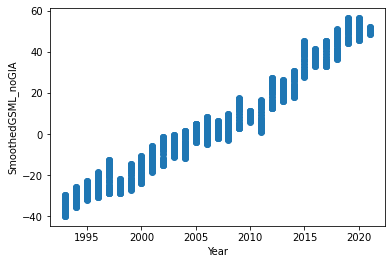

In [3]:
plt.scatter(df.Year, df.SmoothedGSML_noGIA)
plt.xlabel('Year')
plt.ylabel('SmoothedGSML_noGIA')
plt.show()

In [4]:
X = df.Year.values.reshape(-1, 1)

In [5]:
X[:5]

array([[1993],
       [1993],
       [1993],
       [1993],
       [1993]], dtype=int64)

In [6]:
X.shape

(1048, 1)

In [7]:
y = df.SmoothedGSML_noGIA


In [8]:
model = LinearRegression()

In [9]:
model.fit(X, y)

LinearRegression()

In [10]:
y_pred = model.predict(X)
print(y_pred.shape)

(1048,)


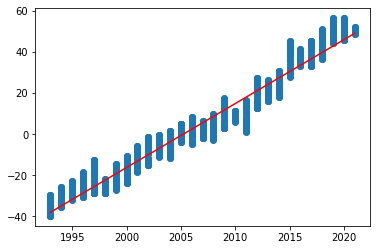

In [11]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [12]:
print(model.coef_)
print(model.intercept_)

[3.10787931]
-6232.011072745922
